In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
old_root = Path('/ihme/covid-19/seir-pipeline-outputs/forecast/2020_07_08.integration_test_2/')
new_root = Path('/ihme/covid-19/seir-forecast/2020_07_13.03/worse/')
old_scale_path = old_root / 'beta_scaling'
new_scale_path = new_root / 'beta_scaling'
old_comp_path = old_root / 'component_draws'
new_comp_path = new_root / 'component_draws'

In [3]:
def load_loc_draw_files(root: Path) -> pd.DataFrame:
    data = []
    for loc_dir in root.iterdir():
        df = load_draw_files(loc_dir)
        df['location_id'] = int(loc_dir.name)
        data.append(df)
    return pd.concat(data)

def load_loc_files(root: Path) -> pd.DataFrame:
    data = []
    for loc_file in root.iterdir():
        df = pd.read_csv(loc_file)
        data.append(df)
        df['location_id'] = int(loc_file.stem.split('_')[0])
    return pd.concat(data)

def load_draw_files(root: Path):
    data = []
    for draw_file in root.iterdir():
        df = pd.read_csv(draw_file)
        df['draw'] = int(draw_file.stem.split('_')[-1])
        data.append(df)
    return pd.concat(data)

def make_hist(old, new, bins=500):
    n_cols = len(old.columns)
    fig, ax = plt.subplots(nrows=n_cols, figsize=(7, 30))
    for i, col in enumerate(old.columns):
        ax[i].hist(((old[col] - new[col])/old[col]).fillna(0), bins=bins)
        ax[i].set_title(col)
    plt.show()

In [4]:
%%time
old_scaling = load_loc_files(old_scale_path).set_index(['location_id', 'draw']).sort_index()
new_scaling = load_draw_files(new_scale_path).set_index(['location_id', 'draw']).sort_index()
new_scaling = new_scaling[old_scaling.columns].loc[old_scaling.index]

CPU times: user 781 ms, sys: 525 ms, total: 1.31 s
Wall time: 1.51 s


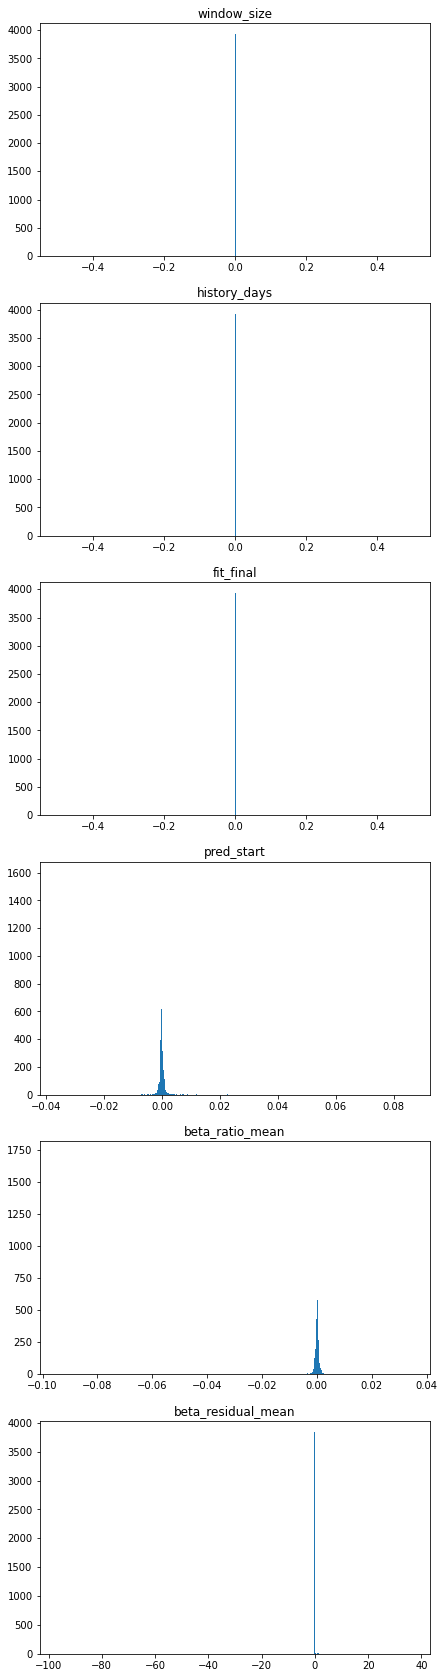

In [5]:
make_hist(old_scaling, new_scaling)

In [ ]:
%%time
old_comp = load_loc_draw_files(old_comp_path).set_index(['location_id', 'draw', 'date']).sort_index()
new_comp = load_draw_files(new_comp_path)
new_comp = new_comp[~new_comp.location_id.isin([60896])].set_index(['location_id', 'draw', 'date']).sort_index()
old_comp = old_comp[new_comp.columns]


In [ ]:
make_hist(old_comp, new_comp)